In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
import pandas as pd

plt.style.use('ggplot')
rcParams['font.family'] = 'serif'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 250
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 1.5
rcParams['errorbar.capsize'] = 1.5
rcParams['figure.constrained_layout.use'] = True
rcParams['figure.figsize'] = [1.61803398875 * 6, 6]

In [54]:
def variance(array):
    '''
    Input:
        Array of measured quantity over time (ie avereage number of infected for SIRS)
    Return:
        The variance of that array
    '''
    return np.average(np.square(array)) - np.square(np.average(array))

def average(array):
    return np.average(array)
def bootstrap(array, function, y):
    '''
    Bootstrap error method calculation
    for a function y = f(x)
    Input:
        array = Array corresponding to x (ie the average number of Infected sites throughout the simulation)
        function = Funtion corresponding to f(x)
        y = calculated values from the data (ie the Variance in Infected sites for SIRS)
    Return:
        An array of the errors of in the input array (ie input = varriance in Infected, return is the error in the variance)
    '''
    c_i = np.zeros(array.shape[0])

    for k in range(array.shape[0]):
        array_removed = np.delete(array, k)


        c_i[k] = function(array_removed)

    return np.sqrt(np.sum((c_i - function(array))**2, axis = 0))

In [31]:
files = os.listdir('/Users/achillequarante/Desktop/output_sirs/')
prob_i_df = pd.DataFrame(index=range(len(files)), columns = ['p1', 'p3', 'avg_i', 'var_i'])
for i, file in enumerate(files):
    array = np.load(f"/Users/achillequarante/Desktop/output_sirs/{file}")/2500
    prob_i_df.iloc[i]['avg_i'] = np.average(array)
    prob_i_df.iloc[i]['p1'] = float(file.split('_')[1])
    prob_i_df.iloc[i]['p3'] = float(file.split('_')[2])
    prob_i_df.iloc[i]['var_i'] = (np.average(np.square(array)) - np.square(np.average(array)))/2500

KeyboardInterrupt: 

In [ ]:
prob_i_df.sort_values(by=['p1', 'p3'])

,p1,p3,avg_i,var_i
6078,0.0,0.0,0.215543,0.000001
2631,0.0,0.01,0.209888,0.000001
7001,0.0,0.02,0.220608,0.000001
5495,0.0,0.03,0.221114,0.000002
8871,0.0,0.04,0.219214,0.000001
...,...,...,...,...
5320,0.99,0.95,0.138851,0.000002
4680,0.99,0.96,0.1394,0.000002
2820,0.99,0.97,0.141217,0.000003
6634,0.99,0.98,0.138152,0.000002


In [ ]:
prob_i_df

,p1,p3,avg_i,var_i
6078,0.0,0.0,0.215543,0.000001
2631,0.0,0.01,0.209888,0.000001
7001,0.0,0.02,0.220608,0.000001
5495,0.0,0.03,0.221114,0.000002
8871,0.0,0.04,0.219214,0.000001
...,...,...,...,...
5320,0.99,0.95,0.138851,0.000002
4680,0.99,0.96,0.1394,0.000002
2820,0.99,0.97,0.141217,0.000003
6634,0.99,0.98,0.138152,0.000002


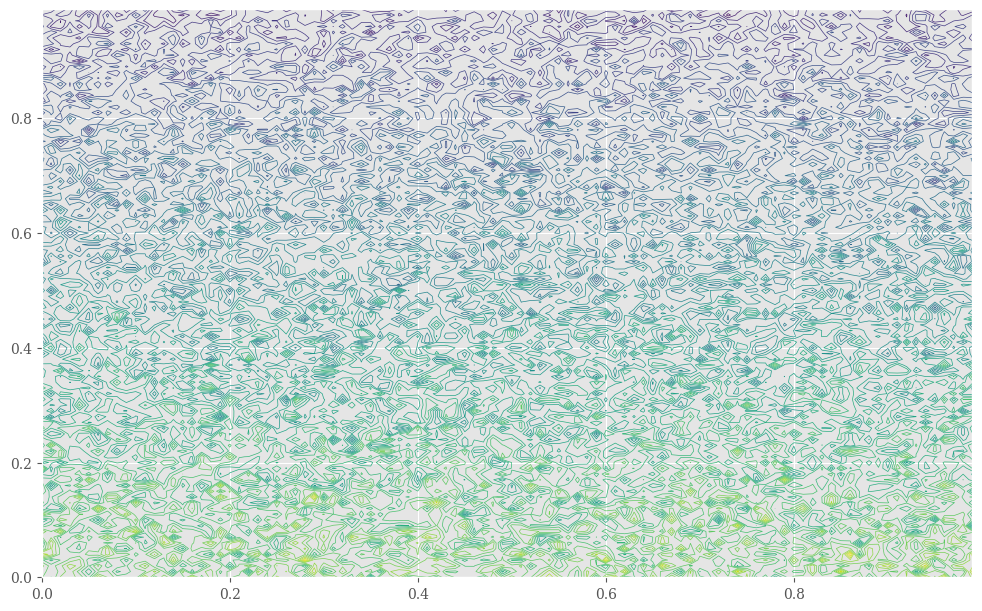

In [ ]:
p1 = np.linspace(0,0.99,100)
p3 = np.linspace(0,0.99,100)
avg_i = np.reshape(np.array(prob_i_df['avg_i']), (100,100))


plt.contour(p1, p3, avg_i, 25)
plt.show()


# Long Run SIRS

In [57]:
files_long = os.listdir('output-sirs-long/')
print(files_long)

long_df = pd.DataFrame(index = range(len(files_long)), columns = ['p1', 'var_i', 'del_avg_i'])
for i, file in enumerate(files_long):
    array =np.load(f"output-sirs-long/{file}")/2500
    y = variance(array)
    long_df.iloc[i]['var_i'] = y
    long_df.iloc[i]['p1'] = float(file.split('.npy')[0].split('-')[-1])
    long_df.iloc[i]['del_avg_i'] = bootstrap(array, variance, y)

long_df = long_df.sort_values('p1')

['infected-0.375.npy', 'infected-long-0.425.npy', 'infected-0.365.npy', 'infected-long-0.335.npy', 'infected-long-0.29.npy', 'infected-long-0.485.npy', 'infected-long-0.245.npy', 'infected-long-0.455.npy', 'infected-long-0.23.npy', 'infected-long-0.35.npy', 'infected-long-0.2.npy', 'infected-long-0.275.npy', 'infected-long-0.305.npy', 'infected-long-0.5.npy', 'infected-long-0.26.npy', 'infected-long-0.32.npy', 'infected-long-0.41.npy', 'infected-long-0.215.npy', 'infected-long-0.47.npy', 'infected-long-0.44.npy']


In [58]:
long_df

,p1,var_i,del_avg_i
10,0.2,0.0,0.0
17,0.215,0.0,0.0
8,0.23,0.0,0.0
6,0.245,0.0,0.0
14,0.26,0.0,0.0
11,0.275,0.0,0.0
4,0.29,0.0,0.0
12,0.305,0.000008,0.000001
15,0.32,0.001387,0.000012
3,0.335,0.000282,0.000004


[]

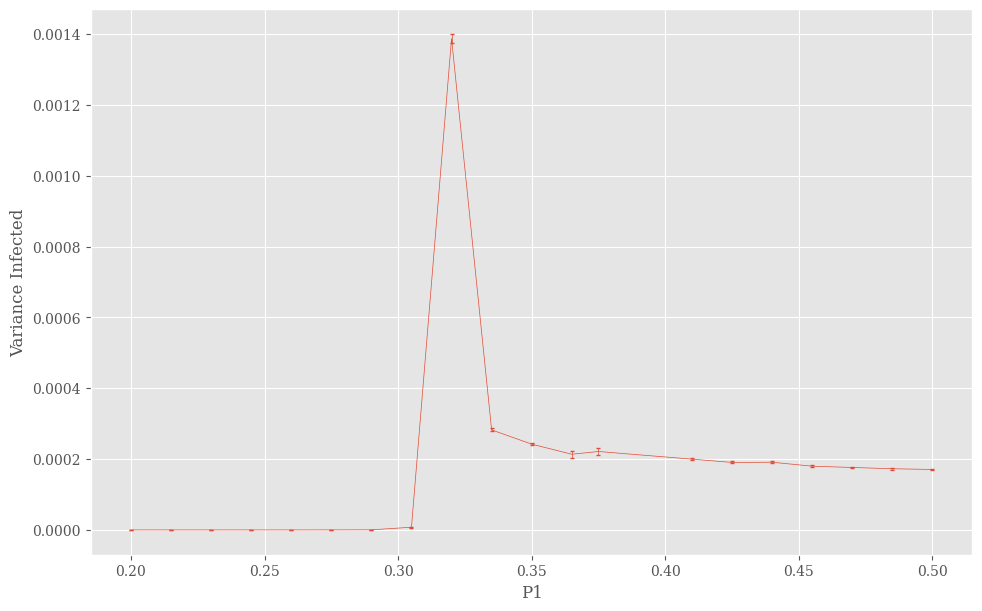

In [59]:
plt.errorbar(long_df['p1'], long_df['var_i'], yerr = long_df['del_avg_i'])
plt.xlabel('P1')
plt.ylabel('Variance Infected')
plt.plot()

# Vaccinated SIRS

In [23]:
files_vacc = os.listdir('output-sirs-vacc/')

vacc_df = pd.DataFrame(index = range(len(files_vacc)), columns = ['vacc/N', 'avg_i'])
for i, file in enumerate(files_vacc):
    vacc_df.iloc[i]['avg_i'] = np.average(np.load(f"output-sirs-vacc/{file}")/2500)
    vacc_df.iloc[i]['vacc/N'] = float(file.split('.')[0].split('_')[1])

vacc_df.sort_values('vacc/N')

,vacc/N,avg_i
86,0.0,0.254493
12,10.0,0.252324
161,20.0,0.249164
151,30.0,0.249031
119,40.0,0.246258
...,...,...
24,1760.0,0.0
13,1770.0,0.0
175,1780.0,0.0
136,1790.0,0.0


[]

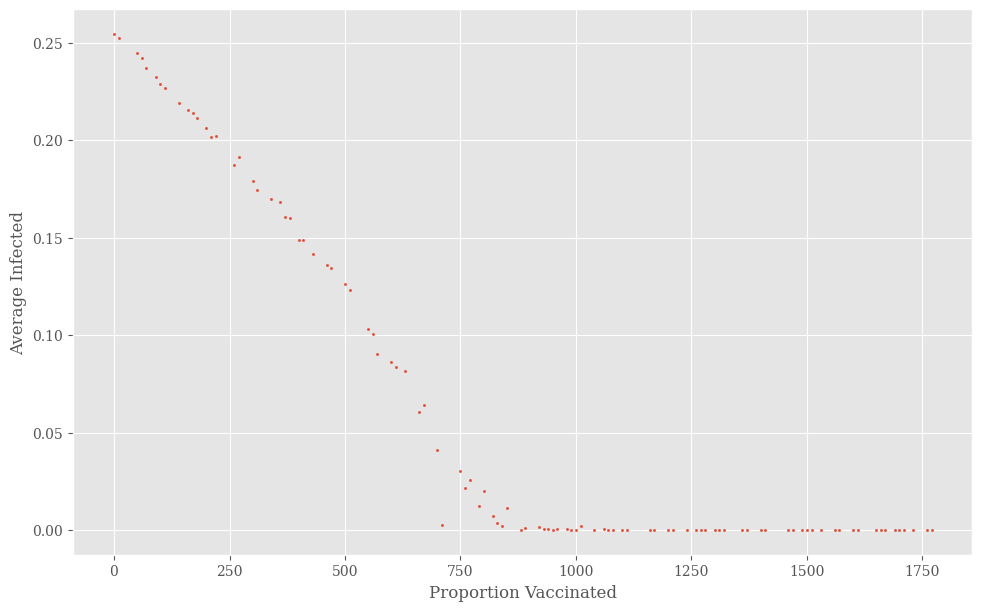

In [28]:
plt.scatter(vacc_df['vacc/N'][:100], vacc_df['avg_i'][:100])
plt.xlabel('Number Vaccinated')
plt.ylabel('Average Infected')
plt.plot()

In [ ]:
test = np.load('output-sirs-vacc/infected_700.npy')
print(test.shape)
plt.plot(np.linspace(0,test.shape[0]-1,test.shape[0]), test)
plt.show()